In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/employee-mentalhealth/Employee_mental-health.csv


# The dataset contains data about employers working in an organization and their level of Burnouts during the pandemic period while work from home was a norm.
### Employee ID: The unique ID allocated for each employee
### Date of Joining: The date-time when the employee has joined the organization (example: 2008-12-30)
### Gender: The gender of the employee (Male/Female)
### Company Type: The type of company where the employee is working (Service/Product)
### WFH Setup Available: Is the work from home facility available for the employee (Yes/No)
### Designation: The designation of the employee of work in the organization. In the range of [0.0, 5.0] bigger is higher designation.
### Resource Allocation: The amount of resource allocated to the employee to work, ie. number of working hours. In the range of [1.0, 10.0] (higher means more resource)
### Mental Fatigue Score: The level of fatigue mentally the employee is facing. In the range of [0.0, 10.0] where 0.0 means no fatigue and 10.0 means completely fatigue.
### Burn Rate: The value we need to predict for each employee telling the rate of Bur out while working. In the range of [0.0, 1.0] where the higher the value is more is the burn out.

In [6]:
burnout = pd.read_csv("/kaggle/input/employee-mentalhealth/Employee_mental-health.csv")
burnout

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52
...,...,...,...,...,...,...,...,...,...
22745,fffe31003500370039003100,2008-12-30,Female,Service,No,1.0,3.0,NaN,0.41
22746,fffe33003000350031003800,2008-01-19,Female,Product,Yes,3.0,6.0,6.7,0.59
22747,fffe390032003000,2008-11-05,Male,Service,Yes,3.0,7.0,NaN,0.72
22748,fffe33003300320036003900,2008-01-10,Female,Service,No,2.0,5.0,5.9,0.52


In [7]:
burnout.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           22750 non-null  object 
 1   Date of Joining       22750 non-null  object 
 2   Gender                22750 non-null  object 
 3   Company Type          22750 non-null  object 
 4   WFH Setup Available   22750 non-null  object 
 5   Designation           22750 non-null  float64
 6   Resource Allocation   21369 non-null  float64
 7   Mental Fatigue Score  20633 non-null  float64
 8   Burn Rate             21626 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.6+ MB


In [8]:
burnout.describe()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750.000000,21369.000000,20633.000000,21626.000000
mean,2.178725,4.481398,5.728188,0.452005
std,1.135145,2.047211,1.920839,0.198226
min,0.000000,1.000000,0.000000,0.000000
25%,1.000000,3.000000,4.600000,0.310000
50%,2.000000,4.000000,5.900000,0.450000
75%,3.000000,6.000000,7.100000,0.590000
max,5.000000,10.000000,10.000000,1.000000


In [9]:
burnout['Employee ID'].nunique()

22750

#### Here we could see that there are 22750 unique values in the Employee ID column, which means there are no duplicate values. And also, in terms of analysis, the Employee ID doesn't provide any assistance to generate insights. Hence, we drop the column using 'drop' function

In [10]:
burnout.drop('Employee ID', axis=1, inplace=True)
burnout

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52
...,...,...,...,...,...,...,...,...
22745,2008-12-30,Female,Service,No,1.0,3.0,NaN,0.41
22746,2008-01-19,Female,Product,Yes,3.0,6.0,6.7,0.59
22747,2008-11-05,Male,Service,Yes,3.0,7.0,NaN,0.72
22748,2008-01-10,Female,Service,No,2.0,5.0,5.9,0.52


#### The 'Date of Joining' column is in object datatype while it should be in datetime format

In [14]:
burnout['Date of Joining'] = pd.to_datetime(burnout['Date of Joining'])
burnout.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date of Joining       22750 non-null  datetime64[ns]
 1   Gender                22750 non-null  object        
 2   Company Type          22750 non-null  object        
 3   WFH Setup Available   22750 non-null  object        
 4   Designation           22750 non-null  float64       
 5   Resource Allocation   21369 non-null  float64       
 6   Mental Fatigue Score  20633 non-null  float64       
 7   Burn Rate             21626 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(3)
memory usage: 1.4+ MB


In [15]:
burnout

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52
...,...,...,...,...,...,...,...,...
22745,2008-12-30,Female,Service,No,1.0,3.0,NaN,0.41
22746,2008-01-19,Female,Product,Yes,3.0,6.0,6.7,0.59
22747,2008-11-05,Male,Service,Yes,3.0,7.0,NaN,0.72
22748,2008-01-10,Female,Service,No,2.0,5.0,5.9,0.52


In [16]:
burnout['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [17]:
burnout['Company Type'].unique()

array(['Service', 'Product'], dtype=object)

In [18]:
burnout['WFH Setup Available'].unique()

array(['No', 'Yes'], dtype=object)

#### Filling up the missing values for the last 3 columns with the mean values of respective columns

In [20]:
burnout['Resource Allocation'].unique()

array([ 3.,  2., nan,  1.,  7.,  4.,  6.,  5.,  8., 10.,  9.])

In [22]:
mean_resource_allocation = burnout['Resource Allocation'].mean()
burnout['Resource Allocation'] = burnout['Resource Allocation'].fillna(mean_resource_allocation).round(0)
burnout['Resource Allocation'].unique()

array([ 3.,  2.,  4.,  1.,  7.,  6.,  5.,  8., 10.,  9.])

In [23]:
burnout['Mental Fatigue Score'].unique()

array([ 3.8,  5. ,  5.8,  2.6,  6.9,  3.6,  7.9,  4.4,  nan,  5.3,  1.8,
        4.7,  5.9,  6.7,  4. ,  7.6,  6.3,  7.7,  6.6,  7.4,  3.9,  3. ,
        8.7,  7.3,  5.4,  6. ,  7.5, 10. ,  6.4,  5.1,  5.6,  6.1,  3.1,
        8. ,  6.8,  4.9,  9.2,  6.5,  6.2,  8.2,  4.1,  4.3,  0.8,  2.9,
        2. ,  9.1,  0. ,  5.7,  8.3,  5.5,  7. ,  3.3,  7.8,  7.2,  5.2,
        8.9,  4.5,  8.1,  8.6,  9.5,  3.5,  4.8,  2.4,  3.7,  1. ,  8.8,
        9.3,  4.6,  9.9,  0.5,  2.8,  9. ,  3.4,  4.2,  1.6,  2.7,  1.3,
        3.2,  8.4,  7.1,  9.4,  2.1,  9.7,  2.5,  1.9,  1.7,  9.6,  0.7,
        0.2,  1.2,  8.5,  9.8,  2.2,  1.1,  0.9,  2.3,  0.4,  1.4,  1.5,
        0.6,  0.3,  0.1])

In [24]:
mean_mental_fatigue = burnout['Mental Fatigue Score'].mean()
burnout['Mental Fatigue Score'] = burnout['Mental Fatigue Score'].fillna(mean_mental_fatigue).round(1)
burnout['Mental Fatigue Score'].unique()

array([ 3.8,  5. ,  5.8,  2.6,  6.9,  3.6,  7.9,  4.4,  5.7,  5.3,  1.8,
        4.7,  5.9,  6.7,  4. ,  7.6,  6.3,  7.7,  6.6,  7.4,  3.9,  3. ,
        8.7,  7.3,  5.4,  6. ,  7.5, 10. ,  6.4,  5.1,  5.6,  6.1,  3.1,
        8. ,  6.8,  4.9,  9.2,  6.5,  6.2,  8.2,  4.1,  4.3,  0.8,  2.9,
        2. ,  9.1,  0. ,  8.3,  5.5,  7. ,  3.3,  7.8,  7.2,  5.2,  8.9,
        4.5,  8.1,  8.6,  9.5,  3.5,  4.8,  2.4,  3.7,  1. ,  8.8,  9.3,
        4.6,  9.9,  0.5,  2.8,  9. ,  3.4,  4.2,  1.6,  2.7,  1.3,  3.2,
        8.4,  7.1,  9.4,  2.1,  9.7,  2.5,  1.9,  1.7,  9.6,  0.7,  0.2,
        1.2,  8.5,  9.8,  2.2,  1.1,  0.9,  2.3,  0.4,  1.4,  1.5,  0.6,
        0.3,  0.1])

In [25]:
burnout['Burn Rate'].unique()

array([0.16, 0.36, 0.49, 0.2 , 0.52, 0.29, 0.62, 0.33, 0.56, 0.67, 0.5 ,
       0.12, 0.4 , 0.51, 0.32, 0.39, 0.59, 0.22, 0.68, 0.57, 0.47, 0.46,
       0.61, 0.91, 0.44, 0.6 , 0.45, 0.19, 0.31, 0.81, 0.42, 0.53,  nan,
       0.94, 0.37, 0.65, 0.38, 0.15, 0.26, 0.28, 0.71, 0.8 , 0.63, 0.79,
       0.72, 0.34, 0.27, 0.66, 0.04, 0.05, 0.11, 0.41, 0.76, 0.43, 0.85,
       0.35, 0.  , 0.55, 0.48, 0.7 , 0.18, 0.23, 0.25, 0.75, 0.1 , 0.73,
       0.58, 0.88, 0.77, 0.3 , 0.06, 0.03, 0.69, 0.24, 0.74, 0.86, 0.92,
       0.78, 0.21, 0.98, 0.02, 0.82, 0.93, 0.83, 0.87, 0.64, 0.54, 0.17,
       1.  , 0.08, 0.09, 0.14, 0.13, 0.07, 0.84, 0.99, 0.01, 0.97, 0.95,
       0.9 , 0.96, 0.89])

In [26]:
mean_burn_rate = burnout['Burn Rate'].mean()
burnout['Burn Rate'] = burnout['Burn Rate'].fillna(mean_burn_rate).round(2)
burnout['Burn Rate'].unique()

array([0.16, 0.36, 0.49, 0.2 , 0.52, 0.29, 0.62, 0.33, 0.56, 0.67, 0.5 ,
       0.12, 0.4 , 0.51, 0.32, 0.39, 0.59, 0.22, 0.68, 0.57, 0.47, 0.46,
       0.61, 0.91, 0.44, 0.6 , 0.45, 0.19, 0.31, 0.81, 0.42, 0.53, 0.94,
       0.37, 0.65, 0.38, 0.15, 0.26, 0.28, 0.71, 0.8 , 0.63, 0.79, 0.72,
       0.34, 0.27, 0.66, 0.04, 0.05, 0.11, 0.41, 0.76, 0.43, 0.85, 0.35,
       0.  , 0.55, 0.48, 0.7 , 0.18, 0.23, 0.25, 0.75, 0.1 , 0.73, 0.58,
       0.88, 0.77, 0.3 , 0.06, 0.03, 0.69, 0.24, 0.74, 0.86, 0.92, 0.78,
       0.21, 0.98, 0.02, 0.82, 0.93, 0.83, 0.87, 0.64, 0.54, 0.17, 1.  ,
       0.08, 0.09, 0.14, 0.13, 0.07, 0.84, 0.99, 0.01, 0.97, 0.95, 0.9 ,
       0.96, 0.89])

#### The data seems to be cleaned and ready for analysis

## 1. Does the gender of employees impact their burnout rate?

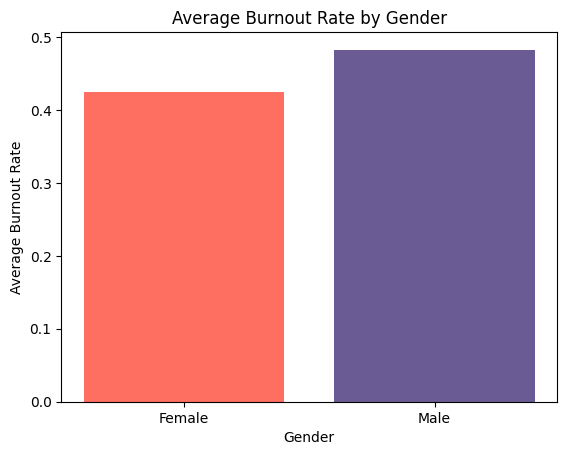

In [28]:
import matplotlib.pyplot as plt

average_burnout_by_gender = burnout.groupby('Gender')['Burn Rate'].mean()

colors = ['#FF6F61', '#6B5B95']

plt.bar(average_burnout_by_gender.index, average_burnout_by_gender, color=colors)

plt.xlabel('Gender')
plt.ylabel('Average Burnout Rate')
plt.title('Average Burnout Rate by Gender')

plt.show()

#### The burnout rate is higher in males when compared to that of females

## 2. Is there a relationship between resource allocation and burnout rate?

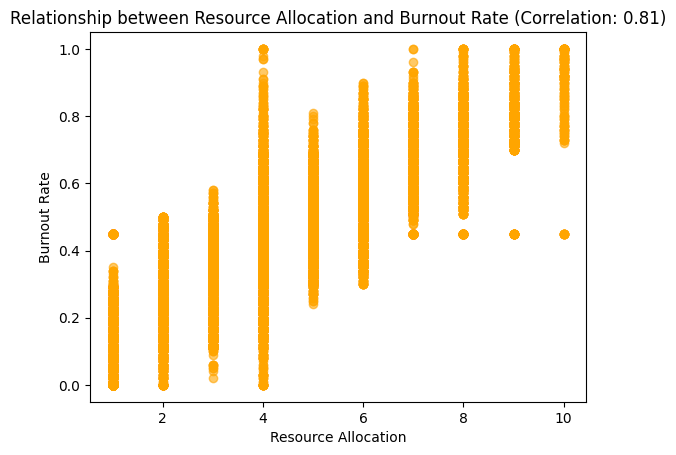

In [29]:
correlation = burnout['Resource Allocation'].corr(burnout['Burn Rate'])

# Create a scatter plot
plt.scatter(burnout['Resource Allocation'], burnout['Burn Rate'], color='orange', alpha=0.6)

# Set labels and title
plt.xlabel('Resource Allocation')
plt.ylabel('Burnout Rate')
plt.title('Relationship between Resource Allocation and Burnout Rate (Correlation: {:.2f})'.format(correlation))

# Display the plot
plt.show()


#### There is a direct relationship between Resources allocated to an employee and burnout rate. Higher the Resources Allocated, higher is the Burnout rate and vice-versa

## 3. How does the availability of work-from-home (WFH) setup affect burnout rate?

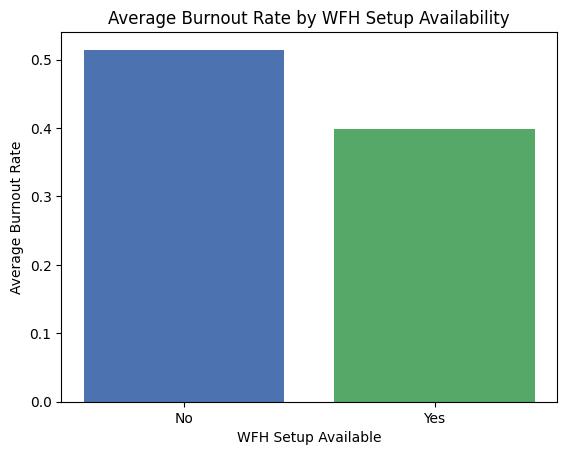

In [30]:
average_burnout_by_wfh = burnout.groupby('WFH Setup Available')['Burn Rate'].mean()

colors = ['#4C72B0', '#55A868']

plt.bar(average_burnout_by_wfh.index, average_burnout_by_wfh, color=colors)

plt.xlabel('WFH Setup Available')
plt.ylabel('Average Burnout Rate')
plt.title('Average Burnout Rate by WFH Setup Availability')

plt.show()

#### The employers seems to be less burned out if they are working from home when compared to not working remotely

## 4. Are there any differences in burnout rate between service and product-based companies?

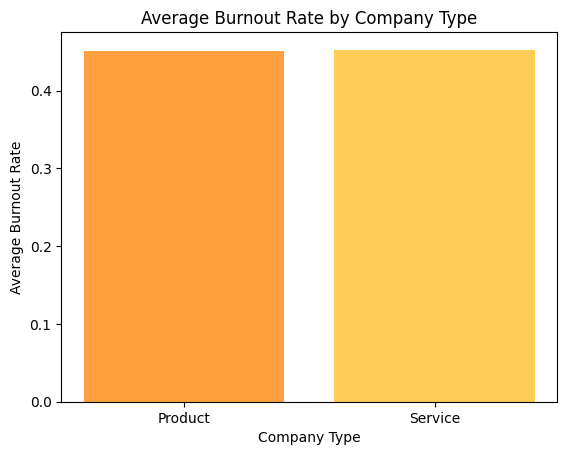

In [31]:
average_burnout_by_company_type = burnout.groupby('Company Type')['Burn Rate'].mean()

colors = ['#FF9F40', '#FFCD56']

plt.bar(average_burnout_by_company_type.index, average_burnout_by_company_type, color=colors)

plt.xlabel('Company Type')
plt.ylabel('Average Burnout Rate')
plt.title('Average Burnout Rate by Company Type')

plt.show()

#### The company type doesn't seem to have an impact in terms of Burnout rates on working employees

## 5. Does the length of employment impact the burnout rate?

#### Assuming that the employers are still working, we will calculate number of years of experience they have in that organization

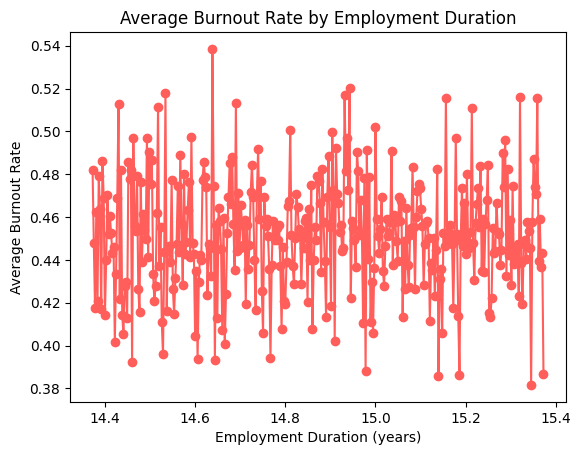

In [36]:
burnout['Date of Joining'] = pd.to_datetime(burnout['Date of Joining'])

burnout['Employment Duration'] = (current_date - burnout['Date of Joining']).dt.days / 365

average_burnout_by_duration = burnout.groupby('Employment Duration')['Burn Rate'].mean()

plt.plot(average_burnout_by_duration.index, average_burnout_by_duration, marker='o', color='#FF5E5B')

plt.xlabel('Employment Duration (years)')
plt.ylabel('Average Burnout Rate')
plt.title('Average Burnout Rate by Employment Duration')

plt.show()

#### The employement duration doesn't seem to have a direct impact on the burnout rates

## 6. Is there any relationship between the mental fatigue score and burnout rate?

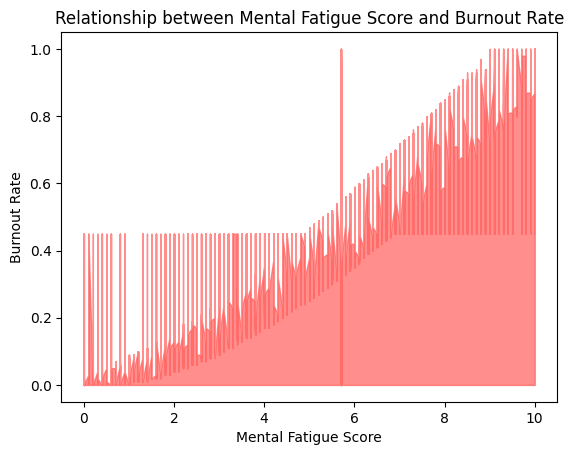

In [38]:
sorted_data = burnout.sort_values('Mental Fatigue Score')

# Create an area chart
plt.fill_between(sorted_data['Mental Fatigue Score'], sorted_data['Burn Rate'], color='#FF5E5B', alpha=0.7)

# Set labels and title
plt.xlabel('Mental Fatigue Score')
plt.ylabel('Burnout Rate')
plt.title('Relationship between Mental Fatigue Score and Burnout Rate')

# Display the plot
plt.show()

#### It was quite obvious that higher the mental fatigue, higher will be the burnout rate of the employee